In [139]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron


In [140]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Crop_Recommendation.csv")

In [141]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [142]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [143]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [144]:
df.shape

(2200, 8)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [146]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [147]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [148]:
df.isnull()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [149]:
df.isnull().any()

Nitrogen       False
Phosphorus     False
Potassium      False
Temperature    False
Humidity       False
pH_Value       False
Rainfall       False
Crop           False
dtype: bool

In [150]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [151]:
df.isnull().sum().sum()

np.int64(0)

In [152]:
df.isnull().mean()*100

Nitrogen       0.0
Phosphorus     0.0
Potassium      0.0
Temperature    0.0
Humidity       0.0
pH_Value       0.0
Rainfall       0.0
Crop           0.0
dtype: float64

In [153]:
df.drop(columns=["Phosphorus","Potassium"])

,Nitrogen,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,20.879744,82.002744,6.502985,202.935536,Rice
1,85,21.770462,80.319644,7.038096,226.655537,Rice
2,60,23.004459,82.320763,7.840207,263.964248,Rice
3,74,26.491096,80.158363,6.980401,242.864034,Rice
4,78,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...
2195,107,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,26.272418,52.127394,6.758793,127.175293,Coffee


In [154]:
df.drop_duplicates()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [155]:
#Standardize features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

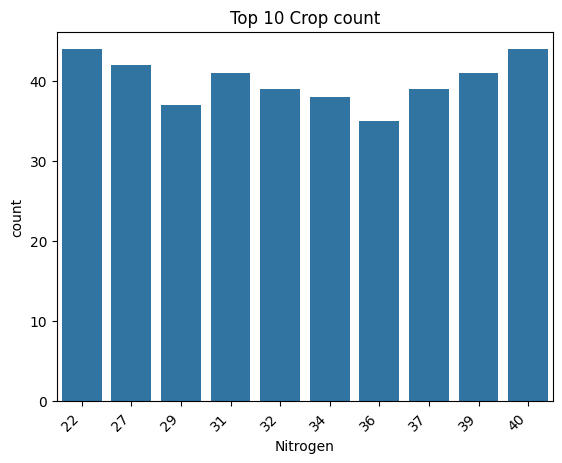

In [157]:
#Universal Analysis
plt.xticks(rotation=45, ha='right')
top_crops = df['Nitrogen'].value_counts().nlargest(10).index
sns.countplot(x="Nitrogen", data=df[df['Nitrogen'].isin(top_crops)])
plt.title('Top 10 Crop count')
plt.show()


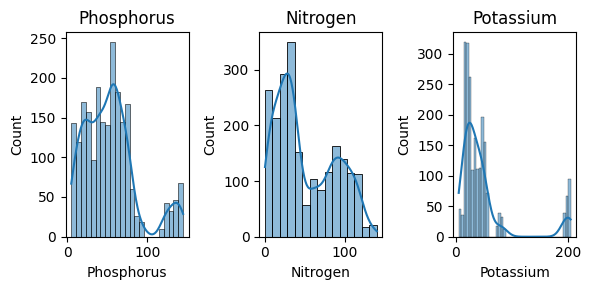

In [158]:
num_cols=['Phosphorus','Nitrogen','Potassium']
fig, axes=plt.subplots(1,3,figsize=(6,3))
for ax,col in zip(axes,num_cols):
    sns.histplot(df[col],kde=True,ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

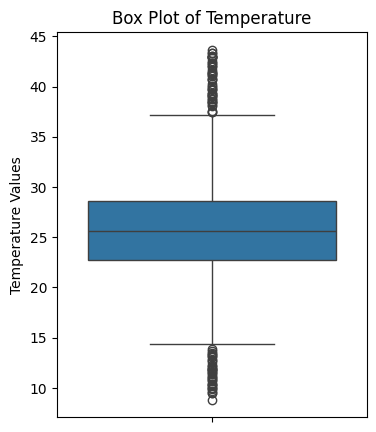

In [159]:
#Bivariate analysis
plt.figure(figsize=(4, 5))
sns.boxplot(y=df['Temperature'])
plt.title('Box Plot of Temperature')
plt.ylabel('Temperature Values')
plt.show()

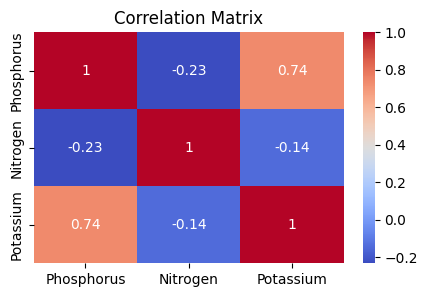

In [160]:
#Correlation matrix for numerical features
plt.figure(figsize=(5,3))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

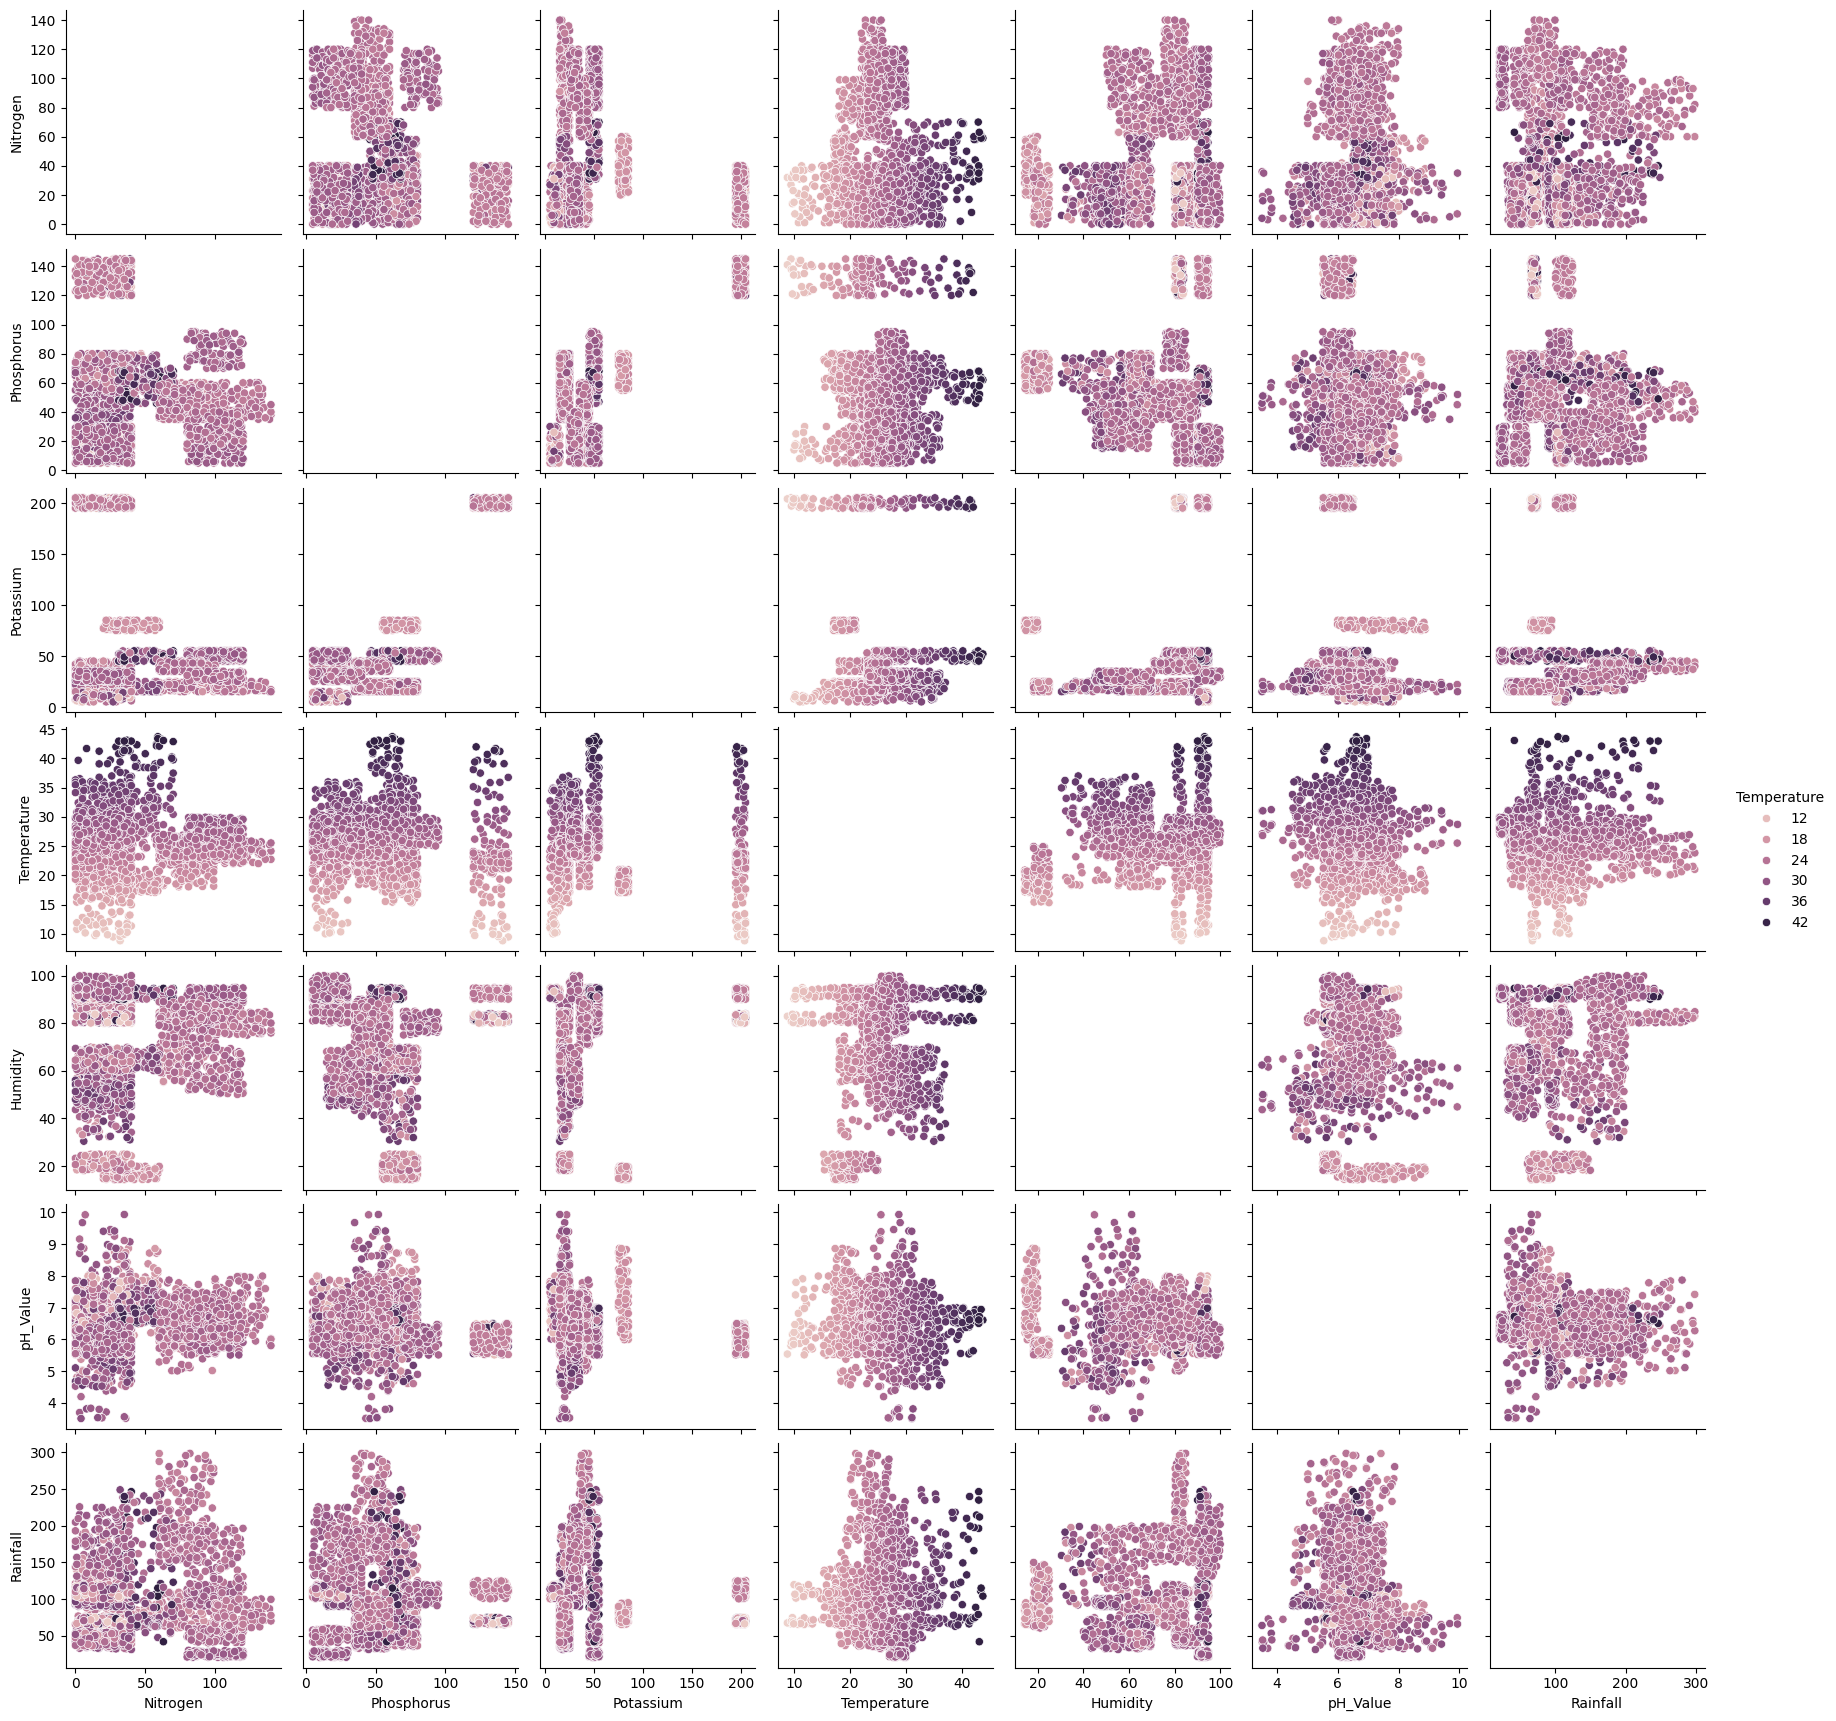

In [161]:
#Pairplot for numerical features coloured by Trafic Density
num_cols = df.select_dtypes(include=['float64', 'int64']).columns  # numerical columns
sns.pairplot(df, vars=num_cols, hue='Temperature')
plt.show()

In [162]:
X=df[["Temperature"]]
y=df["Rainfall"]

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [164]:
X_train.shape

(1760, 1)

In [165]:
X_test.shape

(440, 1)

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
model=LinearRegression()

In [168]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [169]:
y_pred=model.predict(X_test)

In [170]:
from sklearn.metrics import mean_squared_error,r2_score

In [171]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [172]:
mse

3023.9686688008537

In [173]:
r2

-0.004521591010735682

In [174]:
le=LabelEncoder()
df["Phosphorus"]=le.fit_transform(df["Nitrogen"])

In [175]:
X=df[["Phosphorus"]]
y=df["Nitrogen"]

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [177]:
model=SVC(kernel="linear") #linear pair rbf

In [178]:
model.fit(X_train,y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [179]:
y_pred=model.predict(X_test)

In [180]:
acc=accuracy_score(y_pred,y_test)

In [181]:
acc

0.9954545454545455

In [182]:
con=confusion_matrix(y_pred,y_test)

In [183]:
con

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], shape=(116, 116))

In [184]:
cr=classification_report(y_pred,y_test)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [185]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         6
          17       1.00    

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
X=df[["Phosphorus"]]
y=df["Nitrogen"]

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [189]:
model=SVC(kernel="logistic") #logistic pair rbf

In [193]:
model = LogisticRegression()
model.fit(X_train, y_train_classes)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [194]:
y_pred=model.predict(X_test)

In [195]:
# Binarize predictions (example threshold 0.5)
y_pred_labels = (y_pred >= 0.5).astype(int)

# If y_test is continuous, binarize similarly, or ensure it is discrete
y_test_labels = (y_test >= 0.5).astype(int)

acc = accuracy_score(y_test_labels, y_pred_labels)

In [196]:
acc

0.9886363636363636

In [197]:
# Example binarization threshold for binary classification
threshold = 0.5

y_pred_labels = (y_pred >= threshold).astype(int)
y_test_labels = (y_test >= threshold).astype(int)

con = confusion_matrix(y_test_labels, y_pred_labels)

In [198]:
con

array([[  0,   5],
       [  0, 435]])

In [199]:
y_pred_labels = (y_pred >= 0.5).astype(int)
y_test_labels = (y_test >= 0.5).astype(int)

cr = classification_report(y_test_labels, y_pred_labels)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [200]:
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      0.99       435

    accuracy                           0.99       440
   macro avg       0.49      0.50      0.50       440
weighted avg       0.98      0.99      0.98       440



In [201]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)  # continuous y_train allowed

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [202]:
from sklearn.ensemble import RandomForestRegressor
#Initialize the model
model=RandomForestRegressor(n_estimators=100,random_state=42)
#Train the model on the training data
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [203]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(n_estimators=200,learning_rate=0.1,max_depth=5,random_state=42)
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
xgb_model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [204]:
model=Perceptron()
model.fit(X_train,y_train)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0
